# **Introduction to Statistics in Python**

## **Chapter 1 - Summary Statistics**


Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.



In [61]:
# Import libraries requiered
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\8. Introduction to Statistics in Python\\datasets\\food_consumption.csv')


In [62]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


Mean and median


In [63]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))


42.13272727272727
12.59
44.650000000000006
14.58


In [64]:

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


Mean vs. median


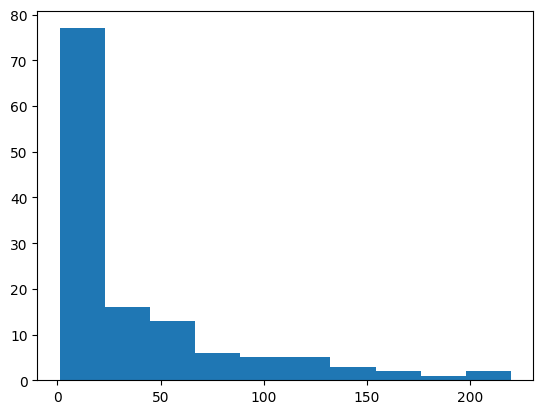

In [65]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [66]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Quartiles, quantiles, and quintiles


In [67]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [68]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))



[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [69]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


In [70]:
# Calculate the eleven quantiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


Variance and standard deviation


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


C:\Users\yeiso\AppData\Local\Temp\ipykernel_24784\1222949537.py:2: FutureWarning: The provided callable <function var at 0x00000177C1D3B100> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
C:\Users\yeiso\AppData\Local\Temp\ipykernel_24784\1222949537.py:2: FutureWarning: The provided callable <function std at 0x00000177C1D3AFC0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))


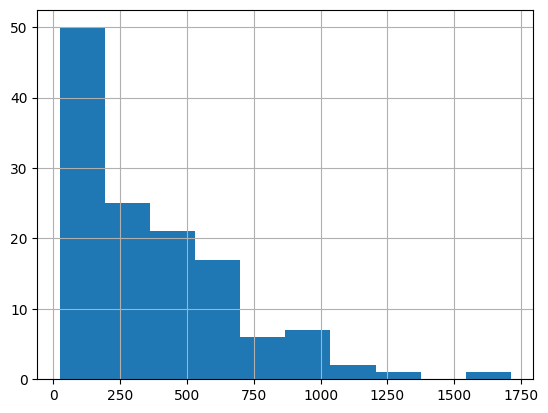

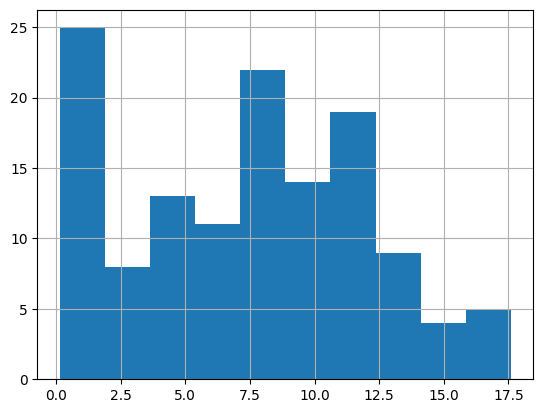

In [71]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

Finding outliers using IQR

In [72]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **Chapter 2 - Random Numbers and Probability**


In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

Calculating probabilities


In [73]:
# Import libraries requiered
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\8. Introduction to Statistics in Python\\datasets\\amir_deals.csv')


In [74]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals['product'].value_counts().sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


Sampling deals


In [75]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)


     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [76]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


Creating a probability distribution


In [77]:
# this part of the code was created randomly by me!import pandas as pd

# Creating the DataFrame
data = {'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]}

restaurant_groups = pd.DataFrame(data)

# Displaying the table
restaurant_groups


,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


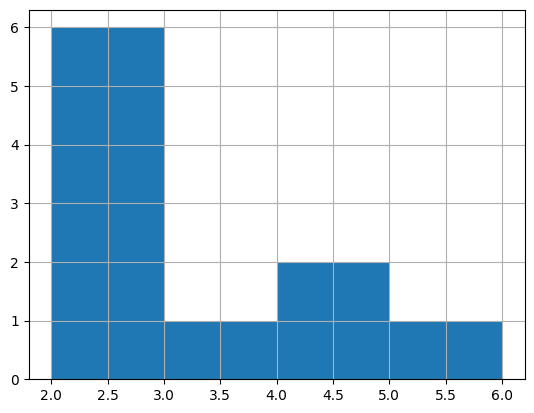

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()


In [79]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']


In [80]:

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])


In [81]:

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]


In [82]:

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


Data back-ups


Calculate probability of waiting less than 5 mins


In [83]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


Calculate probability of waiting more than 5 mins


In [84]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


Calculate probability of waiting 10-20 mins


In [85]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


Simulating wait times


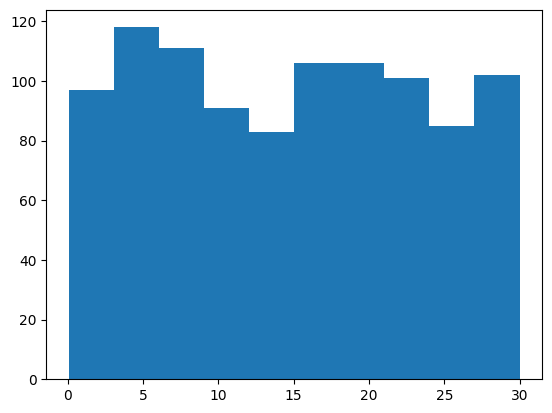

In [86]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Simulating sales deals


In [87]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))



# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


Calculating binomial probabilities


In [88]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1- binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.027
0.784
0.21599999999999997


How many sales will be won?


Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.

Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.

Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [89]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * .35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## **Chapter 3 - More Distributions and the Central Limit Theorem**


It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

Distribution of Amir's sales


In [90]:
# Import libraries requiered
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\8. Introduction to Statistics in Python\\datasets\\amir_deals.csv')


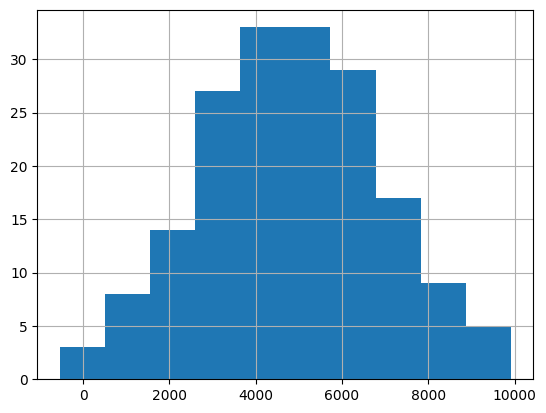

In [91]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()


Probabilities from the normal distribution


In [92]:
# Importing libraries
from scipy.stats import norm
import pandas as pd

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1- norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)


# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


Simulating sales under new market conditions


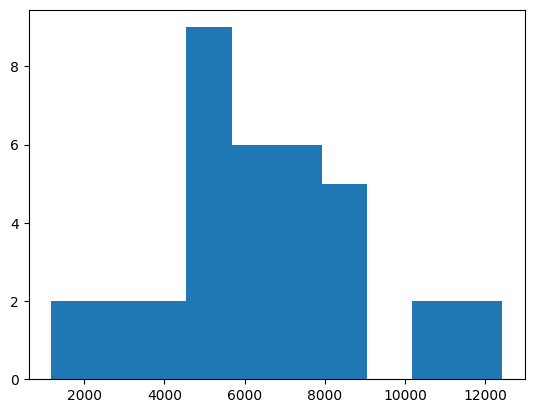

In [93]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(6000, 2600, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

The CLT in action


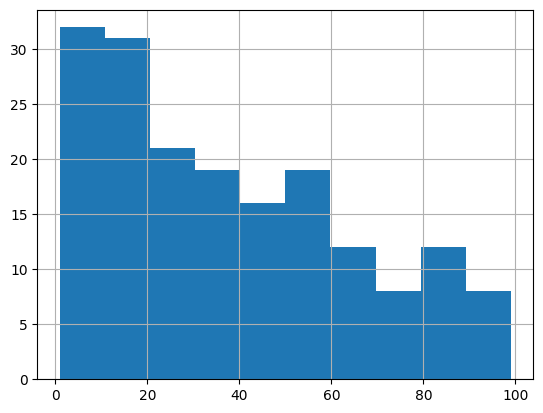

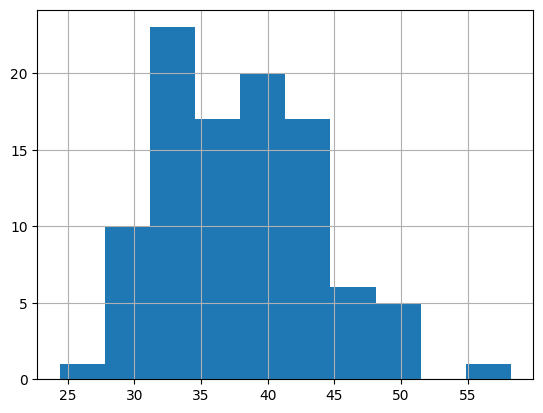

In [94]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

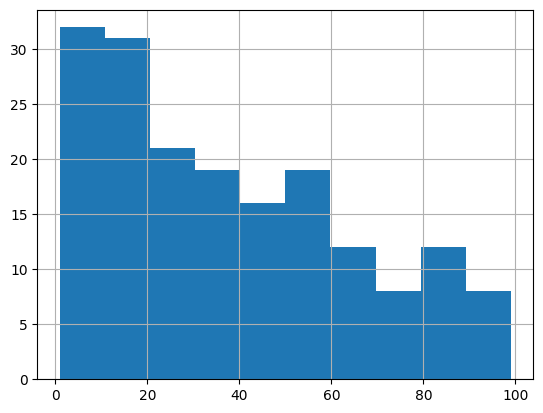

In [95]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [96]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
samp_20_mean = np.mean(samp_20)
print(samp_20_mean)

32.0


In [97]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


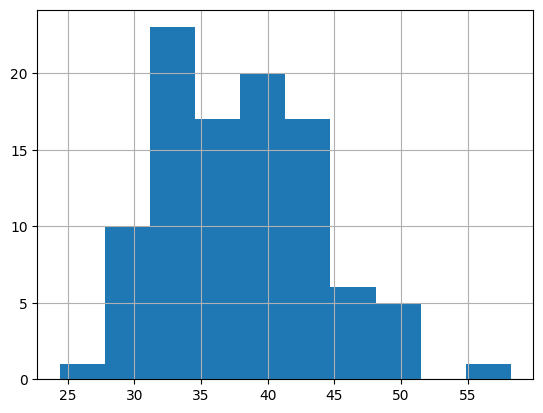

In [98]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

The mean of means


In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

Tracking lead responses


In [100]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)


# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1- poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


Modeling time between leads


In [101]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1- expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


## **Chapter 4 - Correlation and Experimental Design**


In this chapter, you'll learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. You'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions.

In [102]:
# Import libraries requiered
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

world_happiness = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\8. Introduction to Statistics in Python\\datasets\\world_happiness.csv')
print(world_happiness.head(4))

   Unnamed: 0  country  social_support  freedom  corruption  generosity  \
0           1  Finland             2.0      5.0         4.0        47.0   
1           2  Denmark             4.0      6.0         3.0        22.0   
2           3   Norway             3.0      3.0         8.0        11.0   
3           4  Iceland             1.0      7.0        45.0         3.0   

   gdp_per_cap  life_exp  happiness_score  
0        42400      81.8              155  
1        48300      81.0              154  
2        66300      82.6              153  
3        47900      83.0              152  


Relationships between variables


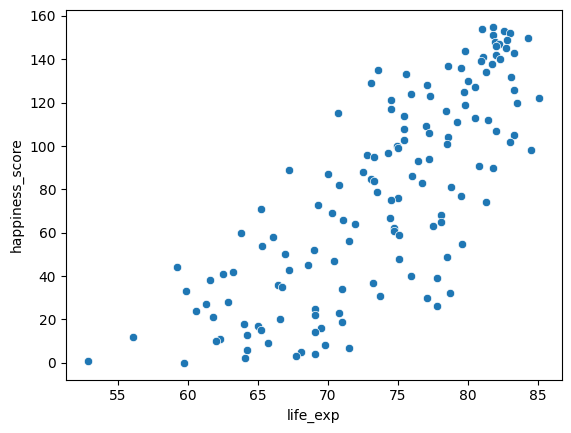

In [103]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(y='happiness_score', x='life_exp', data=world_happiness)

# Show plot
plt.show()

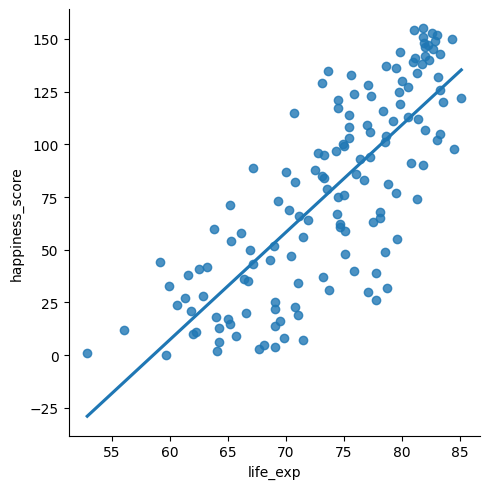

In [104]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

In [105]:

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


What can't correlation measure?


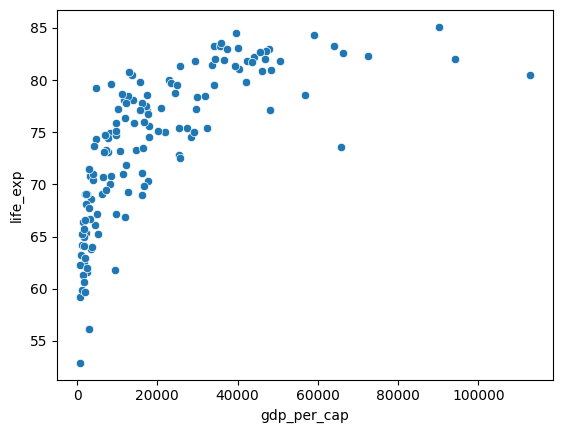

0.7019547642148015


In [106]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness.gdp_per_cap.corr(world_happiness.life_exp)

print(cor)

Transforming variables


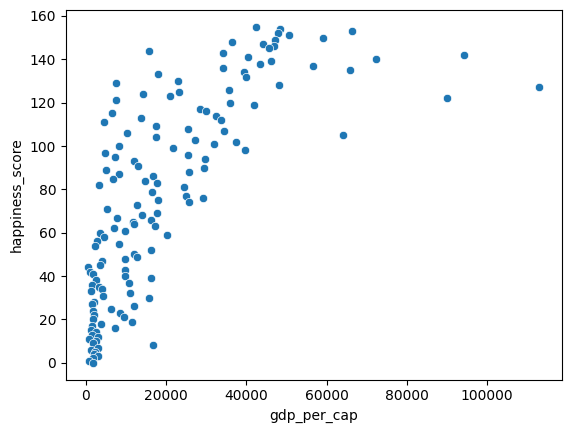

0.7279733012222976


In [107]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(y='happiness_score', x='gdp_per_cap', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness.happiness_score.corr(world_happiness.gdp_per_cap)
print(cor)




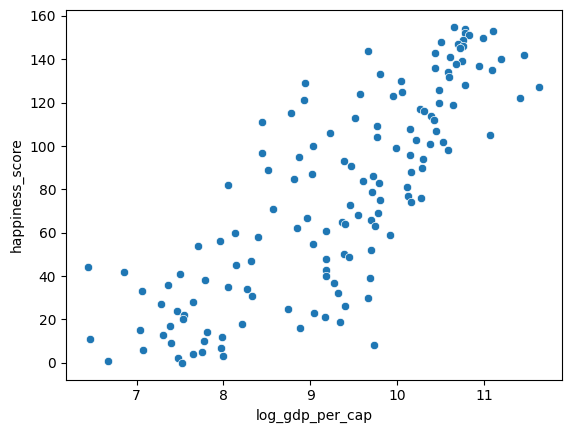

0.8043146004918288


In [108]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness.gdp_per_cap)

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness.happiness_score)
print(cor)

Does sugar improve happiness?


In [ ]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness.grams_sugar_per_day.corr(world_happiness.happiness_score)
print(cor)